In [4]:
wine = read.table("wine.txt", header=TRUE)

year,price,temp,h.rain,w.rain
1952,37,17.1,160,600
1953,63,16.7,80,690
1955,45,17.1,130,502
1957,22,16.1,110,420
1958,18,16.4,187,582
1959,66,17.5,187,485
1960,14,16.4,290,763
1961,100,17.3,38,830
1962,33,16.3,52,697
1963,17,15.7,155,608


      year          price             temp           h.rain     
 Min.   :1952   Min.   : 10.00   Min.   :15.00   Min.   : 38.0  
 1st Qu.:1960   1st Qu.: 14.00   1st Qu.:16.15   1st Qu.: 88.0  
 Median :1967   Median : 22.00   Median :16.40   Median :123.0  
 Mean   :1967   Mean   : 28.81   Mean   :16.47   Mean   :144.8  
 3rd Qu.:1974   3rd Qu.: 35.00   3rd Qu.:17.00   3rd Qu.:185.5  
 Max.   :1980   Max.   :100.00   Max.   :17.60   Max.   :292.0  
     w.rain     
 Min.   :376.0  
 1st Qu.:543.5  
 Median :600.0  
 Mean   :608.4  
 3rd Qu.:705.5  
 Max.   :830.0  

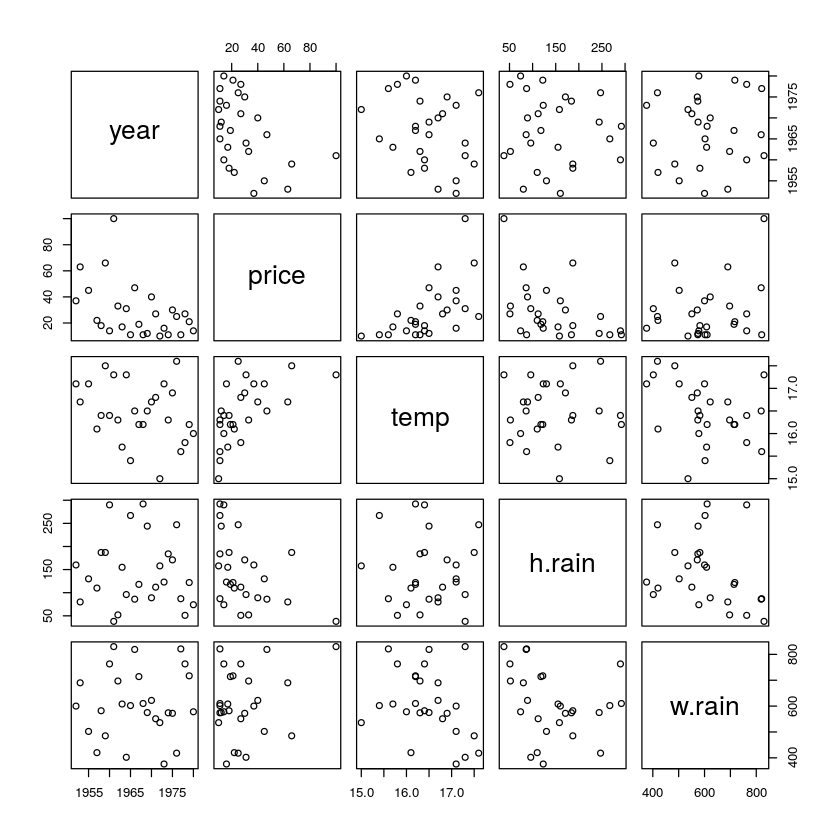

In [5]:
wine
summary(wine)
help(wine)
pairs(wine)

In [25]:
wine.model = lm(price ~ temp + h.rain + w.rain, data=wine)
summary(wine.model)

# negative coefficient means that this factor lowers the price
# the higher it is: This is the case for h.rain (small effect only)
# Higher Temperature makes for a higher price and w.rain (small effect only)


Call:
lm(formula = price ~ temp + h.rain + w.rain, data = wine)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.580  -8.601  -4.057   6.813  29.064 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -365.45179   77.63849  -4.707 9.66e-05 ***
temp          22.50086    4.28502   5.251 2.51e-05 ***
h.rain        -0.09296    0.03746  -2.481   0.0208 *  
w.rain         0.06103    0.02247   2.717   0.0123 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.33 on 23 degrees of freedom
Multiple R-squared:  0.6421,	Adjusted R-squared:  0.5954 
F-statistic: 13.75 on 3 and 23 DF,  p-value: 2.389e-05


In [9]:
fitted(wine.model)

1         2         3         4         5         6         7         8 
41.057259 44.986678 37.865139 12.219022 21.698116 40.529094 23.169506 70.935908 
        9        10        11        12        13        14        15        16 
39.016502 10.509113 39.422979 -7.019141 47.801678 31.668404  9.145727 18.222119 
       17        18        19        20        21        22        23        24 
39.999934 35.778707 -9.914580 30.826021 19.238673 33.825642 33.112373 27.580003 
       25        26        27 
31.887054 31.479645 22.958425

In [10]:
wine.year.model = lm(price ~ temp + h.rain + w.rain + year, data=wine)
# Year might me useful because wine gets more expensive the older it is

In [53]:
summary(wine.year.model)
# Year hat negatives Vorzeichen --> ältere Jahre sind teurer
summary(wine.model)["r.squared"]
summary(wine.model)["sigma"]
summary(wine.year.model)["r.squared"]
summary(wine.year.model)["sigma"]



Call:
lm(formula = price ~ temp + h.rain + w.rain + year, data = wine)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.077  -9.040  -1.018   3.172  26.991 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1305.52761  597.31137   2.186  0.03977 *  
temp          19.25337    3.92945   4.900 6.72e-05 ***
h.rain        -0.10121    0.03297  -3.070  0.00561 ** 
w.rain         0.05704    0.01975   2.889  0.00853 ** 
year          -0.82055    0.29140  -2.816  0.01007 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.69 on 22 degrees of freedom
Multiple R-squared:  0.7369,	Adjusted R-squared:  0.6891 
F-statistic: 15.41 on 4 and 22 DF,  p-value: 3.806e-06


$r.squared
[1] 0.642089

$sigma
[1] 13.32969

$r.squared
[1] 0.7369089

$sigma
[1] 11.68525

In [15]:
wine.log.model = lm(log(price) ~ temp + h.rain + w.rain + year, data=wine)

In [16]:
fitted(wine.log.model)

1        2        3        4        5        6        7        8 
3.841499 3.977271 3.763564 3.072943 3.139537 3.679638 2.921458 4.478718 
       9       10       11       12       13       14       15       16 
3.623951 2.735752 3.675859 2.074447 3.668905 3.213289 2.412232 2.711507 
      17       18       19       20       21       22       23       24 
3.448145 3.314452 1.986043 3.200620 2.689703 3.082911 3.022420 2.842840 
      25       26       27 
3.007730 2.909665 2.775075

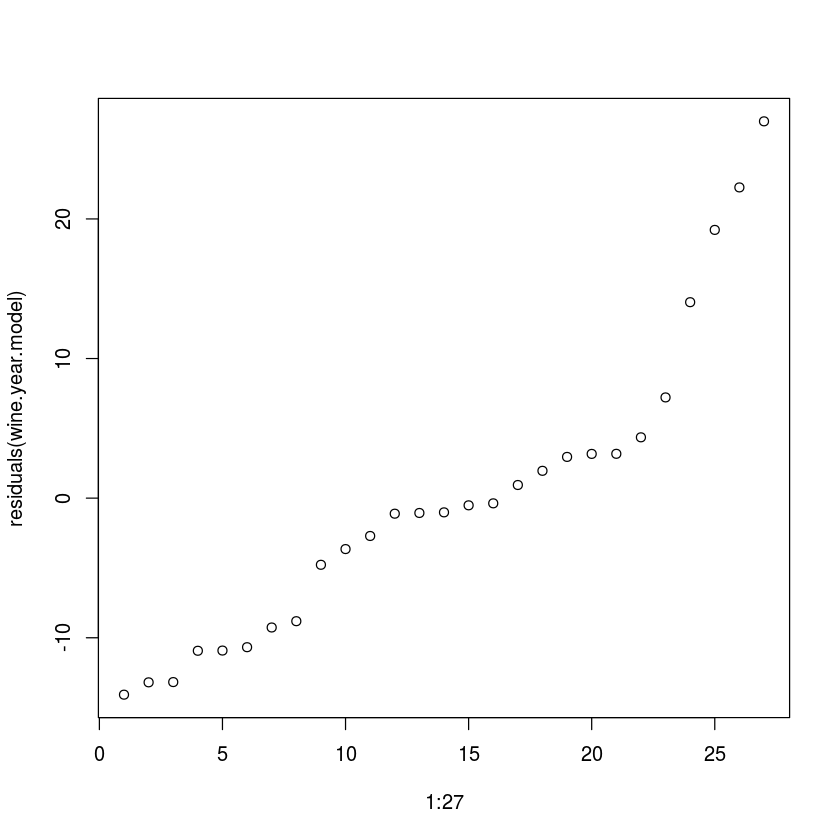

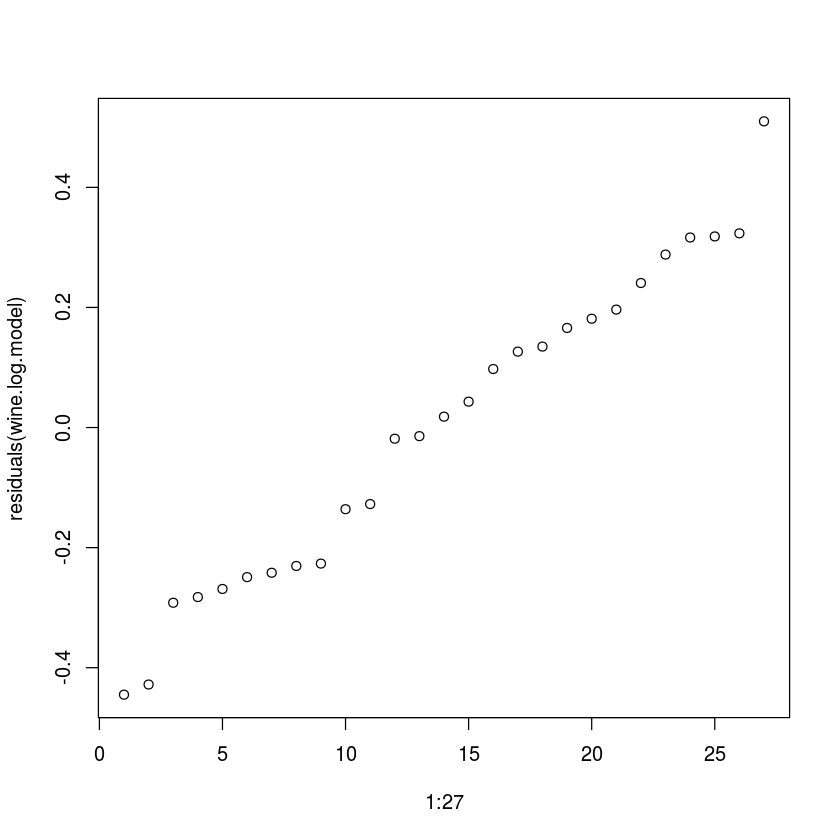

In [34]:
qqplot(1:27,residuals( wine.year.model))  # Error not normally distributed
qqplot(1:27,residuals(wine.log.model))  # Error more or less normally distributed

In [19]:
wine.log.noyear.model = lm(log(price) ~ temp + h.rain + w.rain, data=wine)

In [35]:
summary(wine.log.noyear.model)


Call:
lm(formula = log(price) ~ temp + h.rain + w.rain, data = wine)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.62013 -0.19020  0.01845  0.22507  0.60538 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8.9127465  1.9898110  -4.479  0.00017 ***
temp         0.7150884  0.1098217   6.511 1.21e-06 ***
h.rain      -0.0035035  0.0009602  -3.649  0.00134 ** 
w.rain       0.0013157  0.0005758   2.285  0.03186 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3416 on 23 degrees of freedom
Multiple R-squared:  0.7376,	Adjusted R-squared:  0.7034 
F-statistic: 21.55 on 3 and 23 DF,  p-value: 7.15e-07


In [24]:
anova(wine.log.model, wine.log.noyear.model)
anova(wine.year.model, wine.model)

# Hypothese beta_year = 0
# Alternative beta_year != 0

# Hypothese wird verworfen, da Pr(>F) > F

# Erlöärung Tabelle Skript Seite 89

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
22,1.730779,NA,NA,NA,NA
23,2.684339,-1,-0.9535598,12.12073,0.002115994


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
22,3003.994,NA,NA,NA,NA
23,4086.655,-1,-1082.661,7.928959,0.01006655


In [ ]:
# Nutze das 3. model (log mit year)

In [46]:
summary(wine)


      year          price             temp           h.rain     
 Min.   :1952   Min.   : 10.00   Min.   :15.00   Min.   : 38.0  
 1st Qu.:1960   1st Qu.: 14.00   1st Qu.:16.15   1st Qu.: 88.0  
 Median :1967   Median : 22.00   Median :16.40   Median :123.0  
 Mean   :1967   Mean   : 28.81   Mean   :16.47   Mean   :144.8  
 3rd Qu.:1974   3rd Qu.: 35.00   3rd Qu.:17.00   3rd Qu.:185.5  
 Max.   :1980   Max.   :100.00   Max.   :17.60   Max.   :292.0  
     w.rain     
 Min.   :376.0  
 1st Qu.:543.5  
 Median :600.0  
 Mean   :608.4  
 3rd Qu.:705.5  
 Max.   :830.0  

In [54]:
exp(predict(wine.log.model, data.frame(year=1985, temp=16.47, h.rain=144.8, w.rain=608.4), interval="prediction", level=0.99))

,fit,lwr,upr
1,15.10656,6.257552,36.46922
